Anemia Classification

Import header files

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Read the data from drive

In [300]:
data=pd.read_csv('breast-cancer.csv')

Information about the dataset

In [301]:
data.shape

(569, 32)

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [303]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [304]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [305]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


0 indicates --No anemia
1 indicates--anemia

In [306]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [307]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [308]:
data["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [309]:
# See the min, max, mean values
print('The highest hemoglobin was of:',data['perimeter_mean'].max())
print('The lowest hemoglobin was of:',data['perimeter_mean'].min())
print('The average hemoglobin in the data:',data['perimeter_mean'].mean())

The highest hemoglobin was of: 188.5
The lowest hemoglobin was of: 43.79
The average hemoglobin in the data: 91.96903339191564


In [310]:
# See the min, max, mean values
print('The highest hemoglobin was of:',data['diagnosis'].max())
print('The lowest hemoglobin was of:',data['diagnosis'].min())
print('The average hemoglobin in the data:',data['diagnosis'].mean())

The highest hemoglobin was of: 1
The lowest hemoglobin was of: 0
The average hemoglobin in the data: 0.37258347978910367


Data Visualization in the form graphs

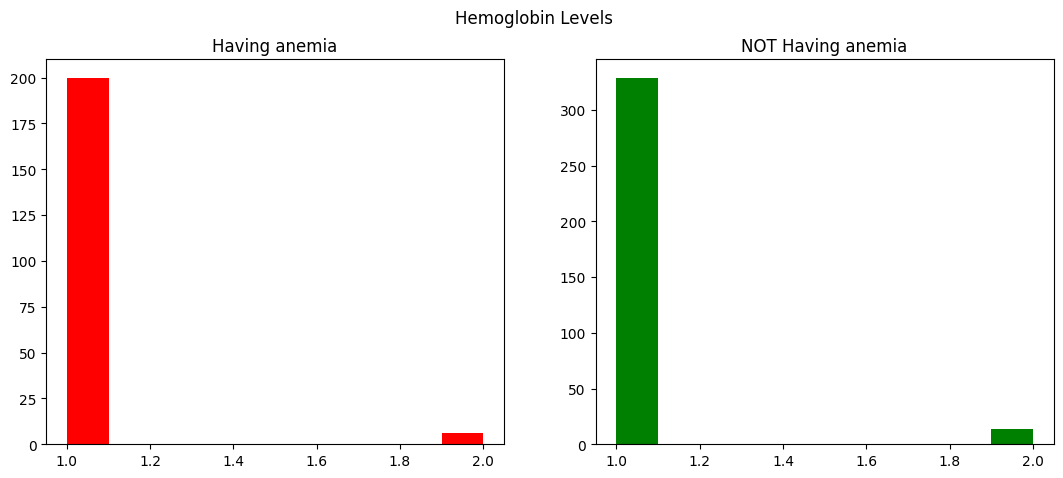

In [311]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['diagnosis']==1]['area_worst'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')

data_len=data[data['diagnosis']==0]['area_worst'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')

fig.suptitle('Hemoglobin Levels')
plt.show()

Pre-Processing

In [312]:
data.isnull().sum() #checking for total null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Normalization

In [313]:
data[1:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [314]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["diagnosis", "Radius_Mean", "Area_Mean", "Smoothness_Mean"])
scaled_df.head()

,diagnosis,Radius_Mean,Area_Mean,Smoothness_Mean
0,0.06868,0.051800,0.022019,0.054122
1,0.06868,0.059229,0.037695,0.058573
2,0.06868,0.056695,0.045078,0.057295
3,0.06868,0.032883,0.043232,0.034192
4,0.06868,0.058423,0.030419,0.059543


In [315]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

split into train and test in the ration 70:30

In [316]:
from sklearn.preprocessing import LabelEncoder # converts gender into numbers
label_encoder = LabelEncoder()
categorical_cols_to_encode = ['diagnosis']
for col in categorical_cols_to_encode:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [317]:
train_test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['diagnosis'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1]]
X=data[data.columns[:-1]]
Y=data['diagnosis']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(398, 398, 171, 171)

In [318]:
# Generate some example data
data = {'continuous_feature': [2.5, 7.2, 15.8, 22.1, 30.5, 35.2, 42.8, 50.3],
        'target': [0, 1, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

# Binning the continuous feature into 3 equal-width bins
num_bins = 3
df['discrete_feature'] = pd.cut(df['continuous_feature'], bins=num_bins, labels=False)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the features and target variables
train_X = train_df[['continuous_feature']]
train_Y = train_df['target']
test_X = test_df[['continuous_feature']]
test_Y = test_df['target']

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(test_Y, prediction)
print('The accuracy of the Logistic Regression is', accuracy)

# Display the DataFrame with the discrete feature
print(df)


The accuracy of the Logistic Regression is 0.0
   continuous_feature  target  discrete_feature
0                 2.5       0                 0
1                 7.2       1                 0
2                15.8       0                 0
3                22.1       1                 1
4                30.5       0                 1
5                35.2       1                 2
6                42.8       0                 2
7                50.3       1                 2


In [319]:


model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [320]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Preprocess the data
train_X = train_X.values.reshape(-1, 1)
test_X = test_X.values.reshape(-1, 1)
train_Y = LabelEncoder().fit_transform(train_Y)
test_Y = LabelEncoder().fit_transform(test_Y)

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(train_X, train_Y)

# Make predictions on the test data
prediction3 = model.predict(test_X)

# Check the accuracy of the model
print('The accuracy of the Logistic Regression is', accuracy_score(test_Y, prediction3))

# Print the classification report
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [321]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)

The accuracy of Linear Regression is: 1.0
